<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# <u><b>Capstone:</b></u> Recommending adjacent jobs to platfrom delivery riders using NLP and consine similarity

--- 
### Part 2-02: Compare adjacent job - Quality and Safety Inspectors against base job 
---

Quality and safety inspectors enfore the rules and regulations relating to safety of production processes, as well as quality standards relating to goods and services produced, used or sold. They may also administer and regulate quality standards and manufacturing specifications

<p><u>1. KNOWLEDGE</u><br>  
(a). <code>Transportation</code>
- movement of people or goods by air, rail, sea, or road
(b). <code>Safety and Government</code>
- public safety and security
(c). <code>Engineering and Technology</code>
- mechanical
(d). <code>Arts and Humanities</code>
- English language</p>

<p><u>2. SKILLS</u><br>
(a). <code>Basic Skills</code>
- listening to others, not interrupting, and asking good questions
- reading work related information
(b). <code>Problem Solving</code>
- noticing a problem and figuring out the best way to solve it</p>

<p><u>3. ABILITIES</u><br>
(a). <code>Verbal</code>
- listen and understand what people say
- communicate by speaking
(b). <code>Hand and Finger Use</code>
- keep your arm or hand steady</p>

<p><u>4. PERSONALITY</u><br>
People interested in this work like activities that include practical, hands-on problems and solutions. They do well at jobs that need: <code>Independence</code>, <code>Integrity</code>, <code>Cooperation</code>, <code>Attention to Detail</code>, <code>Concern for Others</code>, <code>Dependability</code>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from wordcloud import WordCloud
from matplotlib_venn import venn2

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity 

# user-defined functions
from eda_utils import show_missing, clean_string, get_top_post

In [2]:
# load scrapped job postings
posts=pd.read_csv('../Data/3172_QualitySafetyInspectors.csv') 

In [3]:
posts

,job_exp_required,job_title,job_ssoc,job_description,job_salary
0,2,WORKPLACE SAFETY HEALTH EXECUTIVE,31720,"KEY ROLES REPORTING TO WSH MANAGER, YOU WILL B...",3000
1,5,HSE SECURITY MANAGER,31720,"JOB SUMMARY THE HEALTH, SAFETY AND ENVIRONMENT...",4750
2,2,QEHS ASSISTANT,31720,YOUR ROLE AS THE QUALITY ENVIRONMENTAL HEALTH ...,3000
3,8,GLOBAL HSE MANAGER LOGISTICS OIL GAS ENERGY EPC,31720,ABOUT THE COMPANY OUR CLIENT IS A GLOBAL TRANS...,14000
4,1,HEALTH AND SAFETY EXECUTIVE HSE AND OPERATIONS,31720,"UP TO S$4,500 KEY INDUSTRY PLAYER IN THE REGIO...",3750
...,...,...,...,...,...
255,0,MONTHS SAFE ENTRY OFFICER AT CENTRAL HOUR,31720,MILLENIA WALK $10/HR 2 MONTHS JOB SCOPES ENSUR...,1650
256,0,MONTHS SAFE ENTRY OFFICER AT CENTRAL HOUR,31720,MILLENIA WALK $10/HR 2 MONTHS JOB SCOPES ENSUR...,1875
257,0,MONTHS SAFE ENTRY OFFICER AT CENTRAL HOUR,31720,MILLENIA WALK $10/HR 2 MONTHS JOB SCOPES ENSUR...,1650
258,0,MONTHS SAFE ENTRY OFFICER AT CENTRAL HOUR,31720,MILLENIA WALK $10/HR 2 MONTHS JOB SCOPES ENSUR...,1650


In [4]:
posts['job_salary'].quantile([0.25, 0.5, 0.75])

0.25    3150.0
0.50    4150.0
0.75    6000.0
Name: job_salary, dtype: float64

In [5]:
posts['job_exp_required'].quantile([0.25, 0.5, 0.75])

0.25    1.0
0.50    2.0
0.75    5.0
Name: job_exp_required, dtype: float64

In [6]:
posts=posts[['job_description']].copy(deep=True)
posts['job_description']=posts['job_description'].map(lambda x: x.lower().strip())

In [7]:
show_missing(posts)

,variable,dtype,count,nunique,missing,pc_missing
0,job_description,object,260,122,0,0.0


In [8]:
# Proprocess title_text
posts['job_desc_proc']=posts['job_description'].map(lambda x: clean_string(x, stem='spacy'))

# have explored using NLTK's stemming and lemmazitaion as well. spaCy's lemmazitation produces better results. 
# spaCy lemmatization is better than NLTK lemmatization as it takes into account part-of-speech tag by default
# lemmatization is better than stemming as context of text is important for this analysis.

In [9]:
posts

,job_description,job_desc_proc
0,"key roles reporting to wsh manager, you will b...",key role report wsh manager key assist develop...
1,"job summary the health, safety and environment...",summary health safety environment hse speciali...
2,your role as the quality environmental health ...,role quality environmental health safety qehs ...
3,about the company our client is a global trans...,client global transport logistic solution prov...
4,"up to s$4,500 key industry player in the regio...",s key industry player region mnc good career g...
...,...,...
255,millenia walk $10/hr 2 months job scopes ensur...,millenia walk hr month scope ensure walk check...
256,millenia walk $10/hr 2 months job scopes ensur...,millenia walk hr month scope ensure walk check...
257,millenia walk $10/hr 2 months job scopes ensur...,millenia walk hr month scope ensure walk check...
258,millenia walk $10/hr 2 months job scopes ensur...,millenia walk hr month scope ensure walk check...


<Figure size 640x480 with 0 Axes>

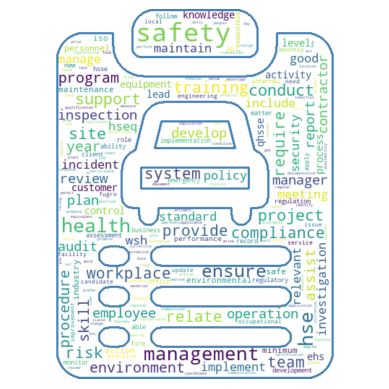

<Figure size 640x480 with 0 Axes>

In [10]:
# Read the whole text.
text = ' '.join(posts['job_desc_proc'])
# read the mask image
van_mask = np.array(Image.open('../Pictures/clipboard.png'))

wc = WordCloud(background_color="white", max_words=200, mask=van_mask, collocations=False, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(text)

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()

In [11]:
# CountVectorizer simply counts the number of times a word appears in a document (using a bag-of-words approach), 
# while TF-IDF Vectorizer takes into account not only how many times a word appears in a document 
# but also how important that word is to the whole corpus. TF-IDF Vectorizer is used below:

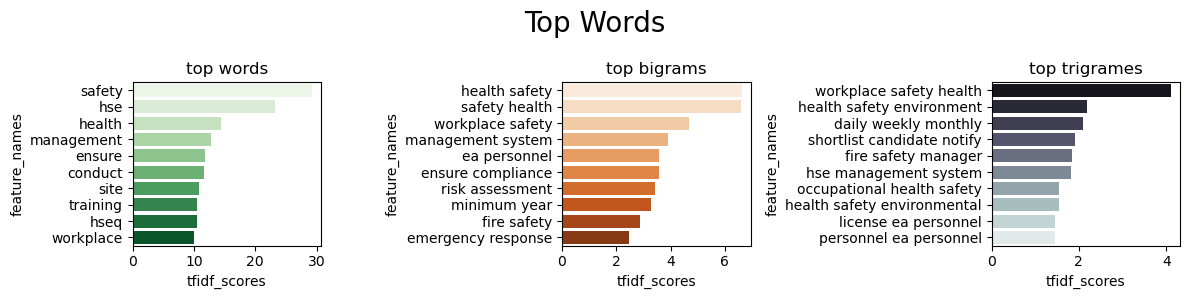

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))

g1=sns.barplot(data=get_top_post(posts['job_desc_proc'], ngram_range=(1,1), n=10),
               y='feature_names', x='tfidf_scores', ax = ax[0], palette='Greens')
g1.set_title(f'top words')

g2=sns.barplot(data=get_top_post(input=posts['job_desc_proc'], ngram_range=(2,2), n=10),
               y='feature_names', x='tfidf_scores', ax = ax[1], palette='Oranges')
g2.set_title(f'top bigrams')

g3=sns.barplot(data=get_top_post(input=posts['job_desc_proc'], ngram_range=(3,3), n=10),
               y='feature_names', x='tfidf_scores', ax = ax[2], palette='bone')
g3.set_title(f'top trigrames')

plt.suptitle('Top Words', fontsize=20)
plt.tight_layout()

In [13]:
posts.to_csv('../Data/3172_QualitySafetyInspectors_cleaned.csv', index=False) 

In [14]:
posts=pd.read_csv('../Data/3172_QualitySafetyInspectors_cleaned.csv') 
base_posts=pd.read_csv('../Data/8322_GoodsVehicleDriver_cleaned.csv') 

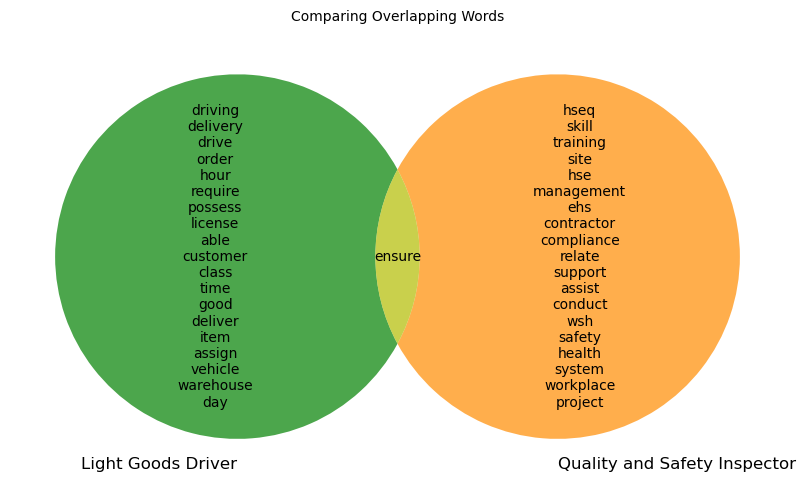

In [15]:
plt.figure(figsize=(10,10))
plt.title('Comparing Overlapping Words',fontsize=10)

set_a = set(get_top_post(input=base_posts['job_desc_proc'],ngram_range=(1,1),n=20)['feature_names'])
set_b = set(get_top_post(input=posts['job_desc_proc'],ngram_range=(1,1),n=20)['feature_names'])

venn = venn2([set_a,set_b],set_labels=['Light Goods Driver','Quality and Safety Inspector'],set_colors=('green', 'darkorange'), alpha = 0.7)
venn.get_label_by_id('100').set_text('\n'.join(map(str,set_a-set_b)))
venn.get_label_by_id('110').set_text('\n'.join(map(str,set_a&set_b)))
venn.get_label_by_id('010').set_text('\n'.join(map(str,set_b-set_a)))

In [16]:
base_top_words_df=get_top_post(base_posts['job_desc_proc'], ngram_range=(1,1), n=1000)
base_top_text = ' '.join(base_top_words_df['feature_names'])

top_words_df=get_top_post(posts['job_desc_proc'], ngram_range=(1,1), n=1000)
top_text = ' '.join(top_words_df['feature_names'])

In [17]:
df=pd.DataFrame(data={'jobs': ['base_job','adjacent_job'], 'top_text' : [base_top_text,top_text]})
count = CountVectorizer()
count_matrix = count.fit_transform(df['top_text'])
cosine_sim = cosine_similarity(count_matrix)
print(cosine_sim)

[[1.   0.49]
 [0.49 1.  ]]
